In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [5]:
city_data= pd.read_csv("city_data.csv")
ride_data= pd.read_csv("ride_data.csv")

In [6]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [7]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [8]:
city_data.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
city_data.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
city_data.count()

city            120
driver_count    120
type            120
dtype: int64


# Get the number of data points for each citiies type.

In [11]:
city_data["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [12]:
# checking for null values
ride_data.isnull().sum()   

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
# checking for data type
ride_data.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])
new_df=pd.merge(city_data,ride_data,on=["city","city"],how="left")
new_df

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850
...,...,...,...,...,...,...
2370,Jessicaport,1,Rural,2019-01-31 17:57:25,58.29,623154556195
2371,South Saramouth,7,Rural,2019-02-20 16:32:36,44.29,3622365199969
2372,South Saramouth,7,Rural,2019-01-28 15:55:33,31.25,7118046558393
2373,South Saramouth,7,Rural,2019-03-27 21:07:16,11.87,170351888128


## create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the average number of drivers for each city type: urban, suburban, and rural.



In [15]:
# sprate the new data frame based on the cities type

urban_cities_df = new_df[new_df["type"] == "Urban"] 
suburban_cities_df = new_df[new_df["type"] == "Suburban"]
rural_cities_df = new_df[new_df["type"] == "Rural"]



In [16]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


In [17]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [18]:
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [19]:
# Get the average number of drivers for each urban city.
urban_avg_driver=urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_avg_driver


city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [20]:
suburban_avg_driver=suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_avg_driver


city
Barronchester         11.0
Bethanyland           22.0
Brandonfort           10.0
Colemanland           23.0
Davidfurt             23.0
East Aaronbury         7.0
East Danielview       22.0
East Kentstad         20.0
East Marymouth         5.0
Grayville              2.0
Josephside            25.0
Lake Ann               3.0
Lake Omar             22.0
Lake Robertside        4.0
Lake Scott            23.0
Lewishaven            23.0
Lewisland              4.0
Mezachester           14.0
Myersshire            19.0
New Olivia            20.0
New Raymond           17.0
New Shannonberg       20.0
Nicolechester         19.0
North Jeffrey         11.0
North Richardhaven     1.0
North Timothy          7.0
Port Shane             7.0
Rodriguezview         20.0
Sotoville             10.0
South Brenda           1.0
South Teresa          21.0
Veronicaberg          20.0
Victoriaport          16.0
West Hannah           12.0
West Kimmouth          4.0
Williamsonville        2.0
Name: driver_count, dty

In [21]:
rural_avg_driver=rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_avg_driver


city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

In [22]:
#create a bubble chart that showcases the average fare versus the total number of rides with bubble size 
# based on the average number of drivers for each city type: urban, suburban, and rural.

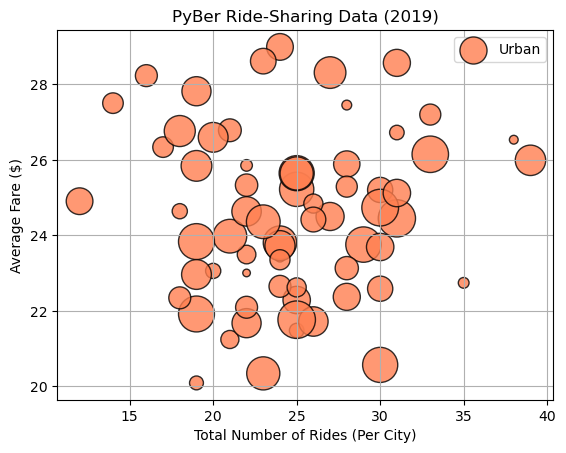

In [23]:
plt.scatter(urban_ride_count,urban_avg_fare,
            s=10*urban_avg_driver, 
            c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel( "Average Fare ($)" )
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()
plt.grid(True)


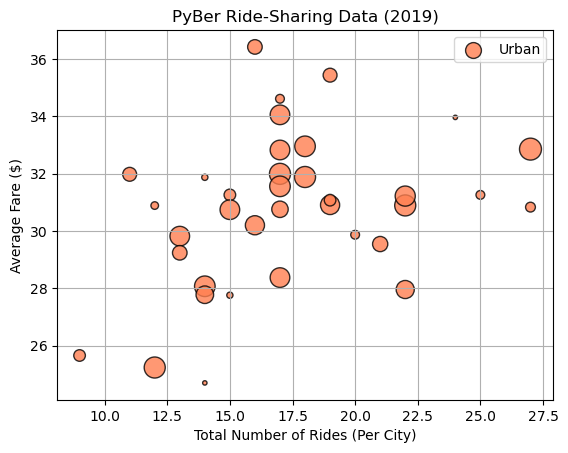

In [24]:
plt.scatter(suburban_ride_count,suburban_avg_fare,
            s=10*suburban_avg_driver, 
            c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel( "Average Fare ($)" )
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()

plt.grid(True)


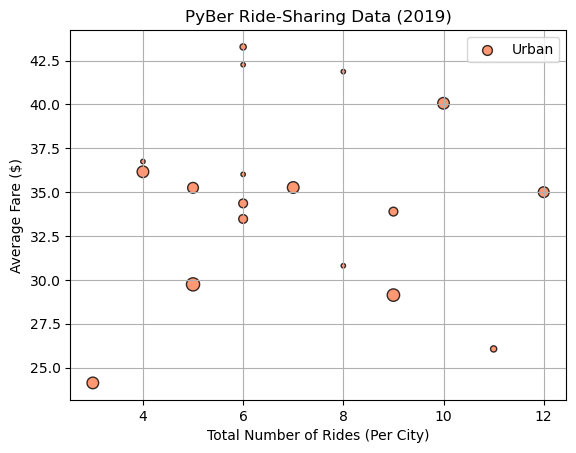

In [25]:
plt.scatter(rural_ride_count,rural_avg_fare,
            s=10*rural_avg_driver, 
            c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel( "Average Fare ($)" )
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()

plt.grid(True)

<function matplotlib.pyplot.show(close=None, block=None)>

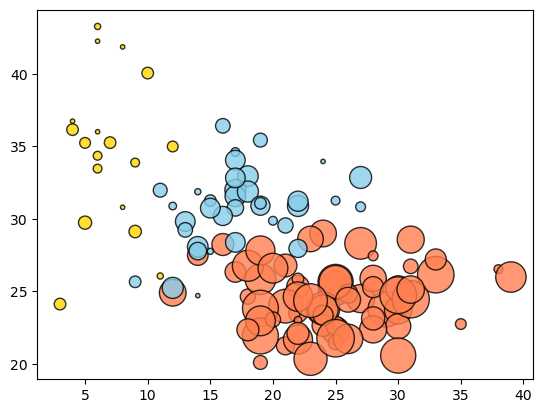

In [26]:
# Add the scatter charts for each type of city.

plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_avg_driver, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_avg_driver, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_avg_driver, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.show

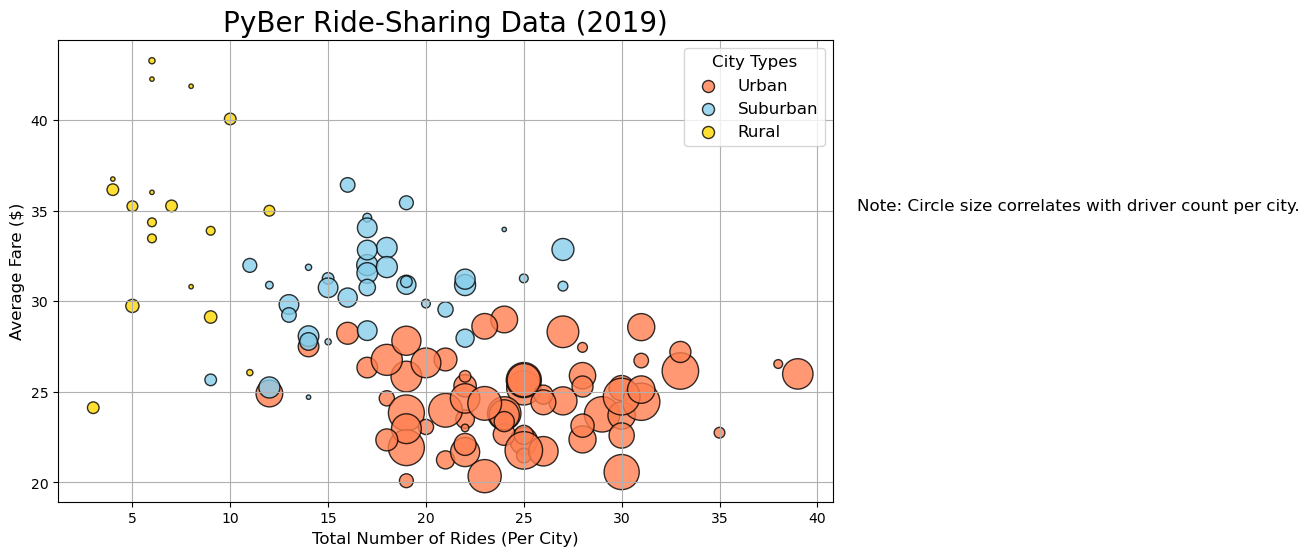

In [27]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_avg_driver, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_avg_driver, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_avg_driver, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
#plt.legend()
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
plt.savefig("analysis/Fig1.png")
plt.show()

In [28]:
urban_cities_df.describe()

,driver_count,fare,ride_id
count,1625.000000,1625.000000,1.625000e+03
mean,36.678154,24.525772,4.873485e+12
std,20.075545,11.738649,2.907440e+12
min,3.000000,4.050000,1.458810e+10
25%,22.000000,14.550000,2.400244e+12
50%,37.000000,24.640000,4.711188e+12
75%,52.000000,34.580000,7.451579e+12
max,73.000000,44.970000,9.991538e+12


In [29]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [30]:
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [31]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [32]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [33]:
urban_ride_count.mean()

24.62121212121212

In [34]:
suburban_ride_count.mean()

17.36111111111111

In [35]:
round(rural_ride_count.mean(),3)

6.944

In [36]:
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [37]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [38]:
urban_ride_count.mode()

0    22
1    25
Name: ride_id, dtype: int64

In [39]:
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14544\1694214379.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_urban_ride_count = sts.mode(urban_ride_count)


In [40]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
mode_suburban_ride_count

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14544\1824298001.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_suburban_ride_count = sts.mode(suburban_ride_count)


ModeResult(mode=array([17], dtype=int64), count=array([7]))

In [41]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.93
1    14.00
2    17.92
3    10.26
4    23.00
Name: fare, dtype: float64

In [42]:
suburban_fares = suburban_cities_df["fare"]
suburban_fares

1625    27.66
1626    42.26
1627    14.95
1628    19.03
1629    31.58
        ...  
2245    33.85
2246    26.66
2247    31.16
2248    22.96
2249    20.41
Name: fare, Length: 625, dtype: float64

In [43]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14544\3250095584.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_suburban_fares = sts.mode(suburban_fares)


In [44]:
rural_fares = rural_cities_df["fare"]
rural_fares

2250    21.63
2251    48.79
2252    32.20
2253    14.11
2254    43.25
        ...  
2370    58.29
2371    44.29
2372    31.25
2373    11.87
2374    57.23
Name: fare, Length: 125, dtype: float64

In [45]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14544\797474813.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_rural_fares = sts.mode(rural_fares)


In [46]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0    38
1    38
2    38
3    38
4    38
Name: driver_count, dtype: int64

In [47]:
urben_driver_mean=np.mean(urban_drivers)
urben_driver_mean

36.67815384615385

In [48]:
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    7
1626    7
1627    7
1628    7
1629    7
Name: driver_count, dtype: int64

In [49]:
suburben_driver_mean=np.mean(suburban_drivers)
suburben_driver_mean

13.712

In [50]:
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    7
2251    7
2252    7
2253    7
2254    7
Name: driver_count, dtype: int64

In [51]:
rural_driver_mean=np.mean(rural_drivers)
rural_driver_mean

4.296

In [52]:
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [53]:
urban_ride_count.shape


(66,)

(array([ 2.,  2., 11., 10., 16., 10.,  6.,  6.,  1.,  2.]),
 array([12. , 14.7, 17.4, 20.1, 22.8, 25.5, 28.2, 30.9, 33.6, 36.3, 39. ]),
 <BarContainer object of 10 artists>)

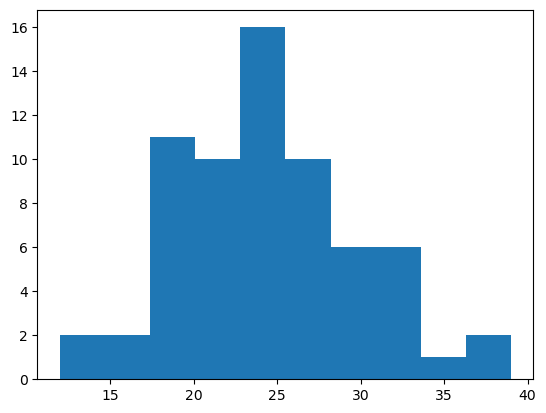

In [54]:
plt.hist(urban_ride_count)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a6ae6a8580>,
 'caps': [<matplotlib.lines.Line2D at 0x1a6ae6a8ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a6ae6a82b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a6ae6b60a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a6ae6b6340>],
 'means': []}

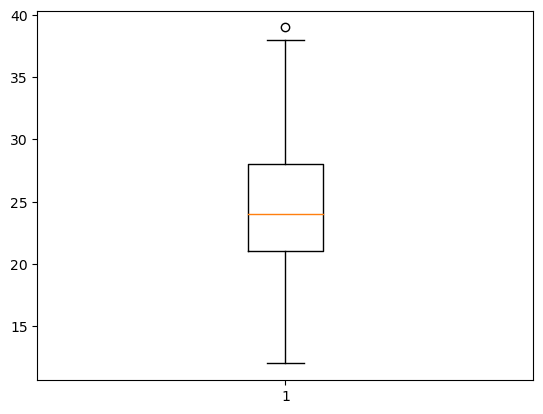

In [55]:
plt.boxplot(urban_ride_count.values)

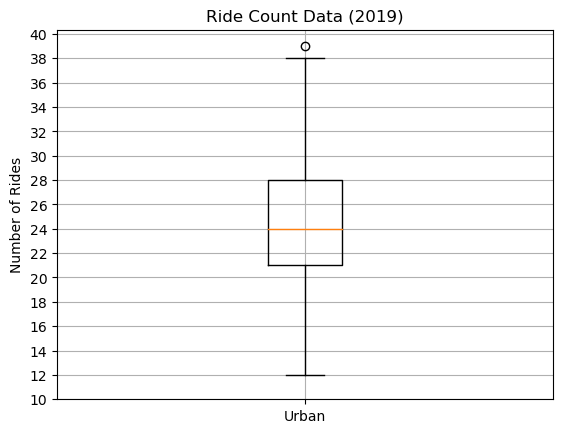

In [56]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [57]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

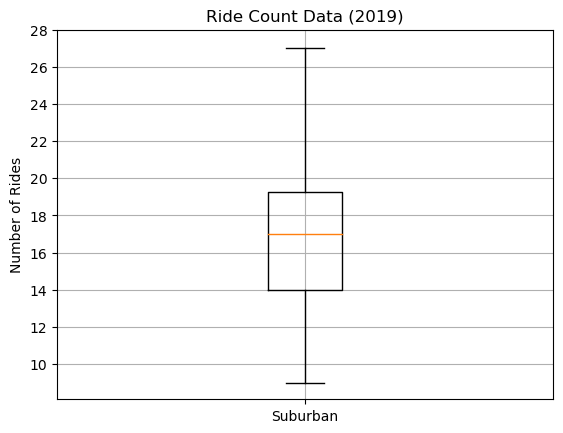

In [58]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 30, step=2.0))
ax.grid()
plt.show()

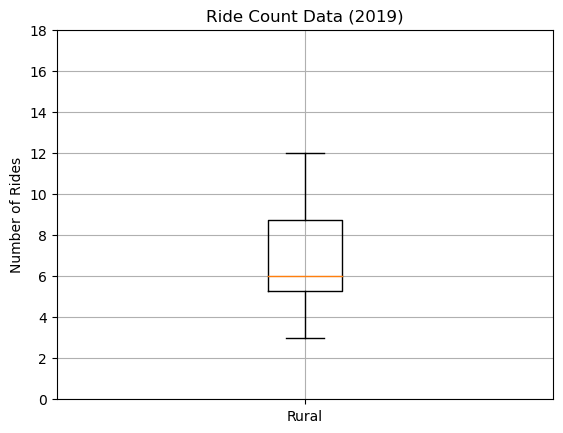

In [59]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 20, step=2.0))
ax.grid()
plt.show()

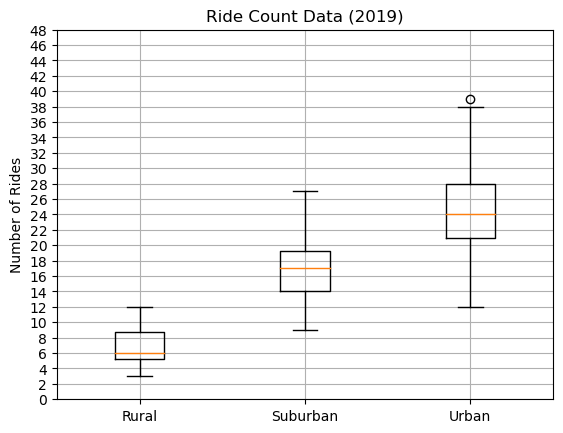

In [60]:
x_labels = ["Rural","Suburban","Urban"]
fig, ax = plt.subplots()
ax.boxplot([rural_ride_count, suburban_ride_count,urban_ride_count],labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 50, step=2.0))

ax.grid()
plt.show()

In [61]:
con=urban_ride_count==39 
urban_ride_count[con]

city
West Angela    39
Name: ride_id, dtype: int64

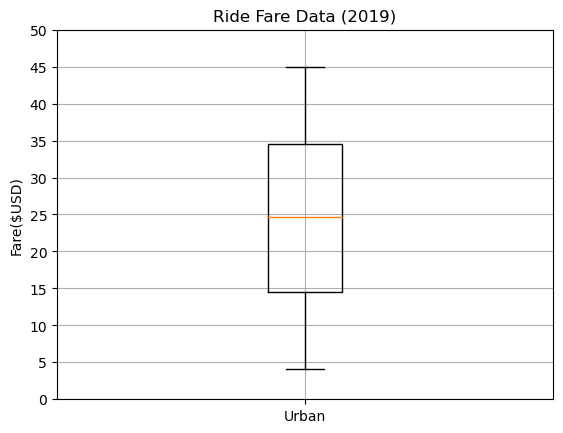

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [62]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

In [63]:
# Get the sum of the fares for each city type.
sum_fares_by_type = new_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [64]:
# Get the sum of all the fares.
total_fares = new_df["fare"].sum()
total_fares

63538.64

In [65]:
type_percents = 100 * sum_fares_by_type / total_fares
type_percents


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [66]:
type_percents = 100 * new_df.groupby(["type"]).sum()["fare"] / new_df["fare"].sum()
type_percents


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

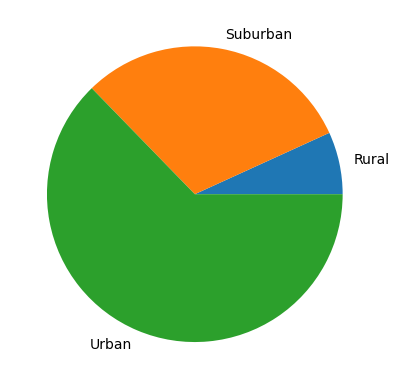

In [67]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()


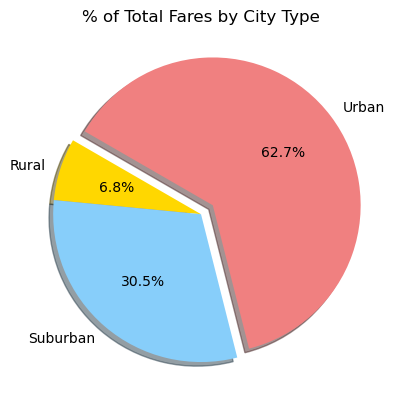

In [68]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()


In [71]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * new_df.groupby(["type"]).count()["ride_id"] / new_df["ride_id"].count()
ride_percents


type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

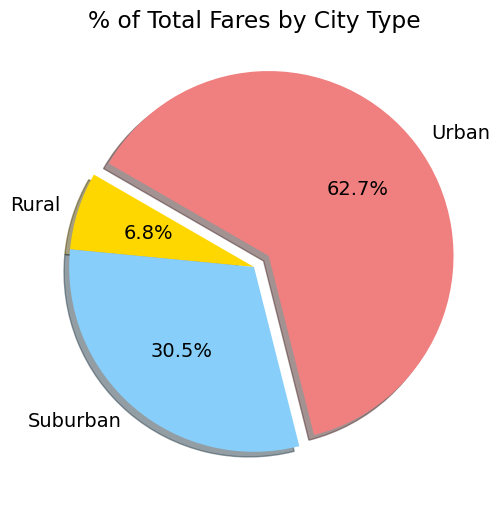

In [73]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show

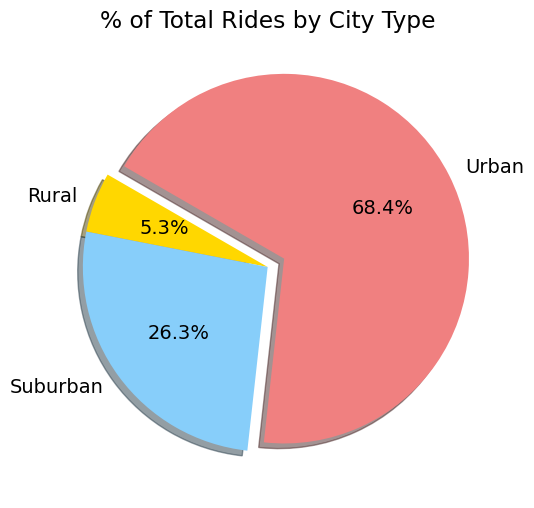

In [74]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [80]:

# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data.groupby(["type"]).sum()["driver_count"] /city_data["driver_count"].sum()
driver_percents



type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

In [78]:
city_data["driver_count"]

0      38
1      59
2      67
3      34
4      39
       ..
115     7
116     2
117     9
118     1
119     7
Name: driver_count, Length: 120, dtype: int64

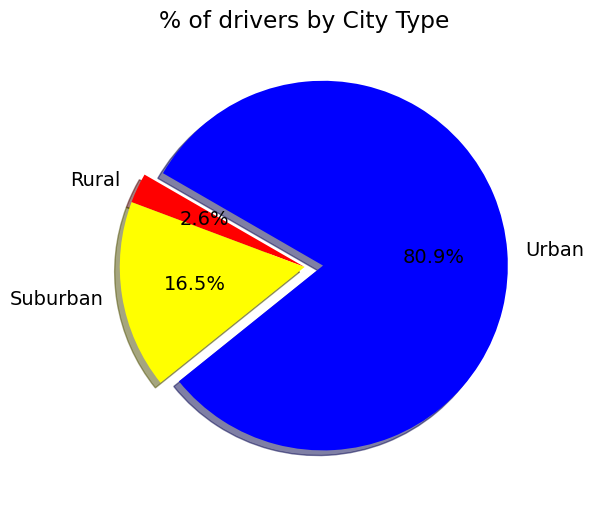

In [81]:
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["red", "yellow", "blue"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()